## Train model with Jing math data


In [1]:
from TrainModel import createImageDataset, showImages, buildTrainAndVal
from pathlib import Path
import numpy as np 
from sklearn.model_selection import train_test_split


#Possible set of labels
# """
# ["pegNormal","pegInversion"]
# ["EasyAdd","HardMult"]
# """


In [ ]:
# dataPath = Path(r"C:\Users\asus\OneDrive - purdue.edu\RealtimeProject\Experiment1-Pilot\UI02\pyprep_edf")
# X, y = createImageDataset(dataPath,imageSize=32,frameDuration=1,overlap=0.2,
#                           augment_data=False, labels = ["pegNormal","pegInversion"],
#                           lstm_format=False, lstm_sequence_length=None,
#                          fileNameFormat=1)


# Eyes open-close dataset
lstm_format = True
lstm_length = 4

dataPath = Path(r'C:\Users\asus\OneDrive - purdue.edu\RealtimeProject\Experiments3-Data\EyesOpen_closeDataset\edf')
X, y = createImageDataset(dataPath,imageSize=64,frameDuration=1,overlap=0.5,
                          augment_data=False, labels = ["EyesClosed","EyesOpen"],
                          lstm_format=False, lstm_sequence_length=lstm_length,
                          fileNameFormat=2)


In [ ]:
dataPath = Path(r"C:\Users\asus\OneDrive - purdue.edu\RealtimeProject\Experiments3-Data\ArithmeticCalibrationProcedure\edf")
X_arith, y_arith = createImageDataset(dataPath,imageSize=64,frameDuration=1,overlap=0.2,
                          image_format=False, augment_data=False, labels = ["EasyAdd","HardMult"],
                          lstm_format=False, lstm_sequence_length=None,
                         fileNameFormat=2)


In [ ]:
# print("Arithmetic dataset size", )
# print(X_arith.shape, y_arith.shape)

print("Inversion/eyes-data dataset size", )
print(X.shape, y.shape)
showImages(X,y)

# X.max()

## Create model


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, TimeDistributed, Input, BatchNormalization, Softmax
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model


def createConvModel(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=input_shape))
    model.add(Dropout(rate=0.3))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Dropout(rate=0.3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

def createLstmModel(input_shape,num_classes, lstmLayers=2, lstmOutputSize=4.0,
                  isBidirectional=1.0, inputLayerNeurons=64, inputLayerDropout=0.25):

    dropoutRate = 0.45
    
    lstmLayers = int(lstmLayers)
    lstmOutputSize =int(lstmOutputSize)
    isBidirectional =int(isBidirectional)

    # Input layer
    networkInput = Input(shape=input_shape)
    dropout1 = Dropout(rate=inputLayerDropout)(networkInput)

    # First Hidden layer
    hidden1 = Dense(inputLayerNeurons, activation='relu')(dropout1)
    dropout2 = Dropout(rate=dropoutRate)(hidden1)
    batchNorm1 = BatchNormalization()(dropout2)

    out = batchNorm1
    for i in range(1, lstmLayers+1):
        retSeq = False if i == lstmLayers else True
        lstmLayer = LSTM(lstmOutputSize, stateful=False, return_sequences=retSeq,
                         dropout=dropoutRate, kernel_regularizer=regularizers.l2(0.05))
        if isBidirectional:
            out = Bidirectional(lstmLayer, merge_mode='concat')(out)
        else:
            out = lstmLayer(out)

    hidden3 = Dense(num_classes, activation='linear')(out)
    networkOutput = Softmax()(hidden3)

    model1 = Model(inputs=networkInput, outputs=networkOutput)
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model1

def createConvLstmModel(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=(input_shape)))
#     model.add(TimeDistributed(Conv2D(8, (3, 3), padding='same')))
# #     model.add(Dropout(rate=0.3))
#     model.add(TimeDistributed(Activation('relu')))
#     model.add(Dropout(rate=0.3))
    model.add(TimeDistributed(Conv2D(16, (3, 3))))
    model.add(TimeDistributed(Activation('relu')))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
#     model.add(Dropout(0.25))

    model.add(TimeDistributed(Flatten()))
    model.add(TimeDistributed(Dense(45)))
    model.add(TimeDistributed(Activation('relu')))
    #model.add(Dropout(0.5))
    
    #LSTM layer
    model.add(Bidirectional(LSTM(20, stateful=False, dropout=0.35)))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model
 
def createConvLstmModel(input_shape, num_classes):
    networkInput = Input(shape=input_shape)
    
#     model.add(TimeDistributed(Conv2D(8, (3, 3), padding='same')))
# #     model.add(Dropout(rate=0.3))
#     model.add(TimeDistributed(Activation('relu')))
#     model.add(Dropout(rate=0.3))
    x = TimeDistributed(Conv2D(16, (3, 3))) (network_input) 
    x = TimeDistributed(Activation('relu')) (x)
    x = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

    x = TimeDistributed(Flatten()) (x)
    x = TimeDistributed(Dense(45)) (x)
    x = TimeDistributed(Activation('relu')) (x)
    #model.add(Dropout(0.5))
    
    #LSTM layer
    x = Bidirectional(LSTM(20, stateful=False, dropout=0.35)) (x)
    
    x = Dense(num_classes) (x) 
    networkOutput = Activation('softmax') (x)
    
    model = Model(inputs=networkInput, outputs=networkOutput)
    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model
    

In [ ]:
#Model summary
testModel = createConvModel((64,64,3),2)
testModel.summary()

testModel = createLstmModel((3, 90),2)
testModel.summary()



## Train convolutional network


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)

print(y_train.shape)

img_rows, img_cols = 64, 64

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape = (img_rows, img_cols, 3)

In [ ]:
## Get dataset statistics
print(x_train.shape)
print("Global statistics")
print(x_train.mean())
print(x_train.std())
print("Statistics per color")
print(x_train.mean(axis=(0, 1,2)))
print(x_train.std(axis=(0,1,2)))

##Normalize the dataset

##No normalization -- Seems to yield the best results 
# x_train_2 = x_train
# x_test_2 = x_test

##Method 1: Normalize with global mean and std
global_mean = x_train.mean(); global_std = x_train.std();
x_train_2 = (x_train - global_mean)/global_std;
x_test_2 = (x_test - global_mean)/global_std;

##Method 2: Normalize each color channel independently (e.g normalize the red channel with red mean accross all samples)
# color_mean = x_train.mean(axis=(0, 1,2)); color_std = x_train.std(axis=(0, 1,2));
# color_mean = np.expand_dims(color_mean,axis=(0,1,2))
# x_train_2 = (x_train - color_mean)/color_std;
# x_test_2 = (x_test - color_mean)/color_std;


##Debug
x_train_2.std()

In [ ]:
batch_size = 128
num_classes = 2
epochs = 150
img_size = 64
input_shape = (img_size, img_size, 3)

# convert class vectors to binary class matrices
y_train_2 = keras.utils.to_categorical(y_train, num_classes)
y_test_2 = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(x_train.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

model = createConvModel(input_shape, num_classes)

history = model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2),
          shuffle=True)

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
fig, ax = plt.subplots(1)

ax.set_title("eyes dataset, global normalization, 64px img")
ax.set_ylim((0.4,1))
ax.set_yticks(np.arange(0.4,1,0.05))
ax.grid()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

In [ ]:
#Save model
import pickle
## Save model for real-time
# model.summary()
# print(global_mean, global_std)
model.save('./models/'+'conv_eyes-open-close_64px.h5')
normalizer_dict = {'mean':global_mean,'std':global_std}
image_size=64;frame_length=1;sequence_length=-1;overlap=0.5
config_dict = {'image_size':image_size,'frame_length':frame_length,'sequence_length':sequence_length,'overlap':overlap}

pickle.dump(normalizer_dict, open('./models/'+'conv_eyes-open-close_64px_normalizer.pickle','wb'))
pickle.dump(config_dict,     open('./models/'+'conv_eyes-open-close_64px_config.pickle','wb'))

## Train Convolutional LSTM model

### Loading arithmetic calibration data

In [ ]:
image_size = 32
frame_length = 1
sequence_length = 6
overlap = 0.5
num_classes = 2

In [ ]:
dataPath = Path(r"C:\Users\asus\OneDrive - purdue.edu\RealtimeProject\Experiments3-Data\ArithmeticCalibrationProcedure\edf")
X_arith_seq, y_arith_seq = createImageDataset(dataPath,imageSize=image_size,frameDuration=frame_length,overlap=overlap,
                           augment_data=False, image_format = False, encoded_format = False, labels = ["EasyAdd","HardMult"],
                           lstm_format=True, lstm_sequence_length=sequence_length,
                           fileNameFormat=2)



In [ ]:
# dataPath = Path(r"C:\Users\asus\OneDrive - purdue.edu\RealtimeProject\Experiment1-Pilot\UI02\pyprep_edf")
# X_inver_seq, y_inver_seq = createImageDataset(dataPath,imageSize=32,frameDuration=1,overlap=0.2,
#                           augment_data=False, labels = ["pegNormal","pegInversion"],
#                           lstm_format=False, lstm_sequence_length=None,
#                          fileNameFormat=1)   
print(X.shape)
print(y.shape)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_arith_seq, y_arith_seq, test_size=0.20,shuffle=True)

In [ ]:
##Normalize the dataset

##No normalization -- Seems to yield the best results 
# x_train_2 = x_train
# x_test_2 = x_test

##Global frame/time normalization
global_mean = x_train.mean(); global_std = x_train.std();
x_train_2 = (x_train - global_mean)/global_std;
x_test_2 = (x_test - global_mean)/global_std;

## convert class vectors to binary class matrices
y_train_2 = keras.utils.to_categorical(y_train, num_classes)
y_test_2 = keras.utils.to_categorical(y_test, num_classes)

x_train_2 = x_train_2.astype('float32')
x_test_2 = x_test_2.astype('float32')

print(y_train.shape)
print(x_train.shape)

In [ ]:

##Training
batch_size = 128
num_classes = 2
epochs = 600
input_shape = (sequence_length, image_size,image_size,3)
model = createConvLstmModel(input_shape, num_classes)

history = model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2),
          shuffle=True)

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
fig, ax = plt.subplots(1)

ax.set_title("LSTM classification, arithmetic")
ax.set_ylim((0.4,1))
ax.set_yticks(np.arange(0.4,1,0.05))
ax.grid()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

## Train Simple LSTM model


In [19]:
image_size = 32
frame_length = 1
sequence_length = 20
overlap = 0.5
num_classes = 2

dataPath = Path(r"C:\Users\asus\OneDrive - purdue.edu\RealtimeProject\Experiments3-Data\ArithmeticCalibrationProcedure\edf")

In [ ]:
X_arith_seq, y_arith_seq = createImageDataset(dataPath,imageSize=image_size,frameDuration=frame_length,overlap=overlap,
                           image_format=False,encoded_format=False, augment_data=False, labels = ["EasyAdd","HardMult"],
                           lstm_format=True, lstm_sequence_length=sequence_length,
                           fileNameFormat=2)

# dataPath = Path(r'C:\Users\asus\OneDrive - purdue.edu\RealtimeProject\Experiments3-Data\EyesOpen_closeDataset\edf')
# X_eyes, y_eyes = createImageDataset(dataPath,imageSize=64,frameDuration=1,overlap=0.5,
#                           image_format= False, augment_data=False, labels = ["EyesClosed","EyesOpen"],
#                           lstm_format=True, lstm_sequence_length=sequence_length,
#                          fileNameFormat=2)

In [20]:
# x_train, x_test, y_train, y_test = train_test_split(X_arith_seq, y_arith_seq, test_size=0.20,shuffle=True)
# x_train, x_test, y_train, y_test = train_test_split(X_eyes, y_eyes, test_size=0.20,shuffle=True)

x_train, x_test, y_train, y_test = buildTrainAndVal(dataPath,split_rate=0.20, frame_duration= frame_length,overlap=overlap,
                                                    lstm_format=True,lstm_sequence_length=sequence_length,lstm_stride=2, sequence_overlap=True,
                                                    labels = ["EasyAdd", "HardMult"], file_name_format=2)

Loading train
file information: UJing 2 7 EasyAdd
file information: UJing 3 9 EasyAdd
file information: UJing 2 1 EasyAdd
file information: UJuan 1 11 EasyAdd
file information: UJing 2 3 EasyAdd
file information: UJing 1 11 EasyAdd
file information: UJing 2 11 EasyAdd
file information: UJing 2 9 EasyAdd
file information: UJing 3 1 EasyAdd
file information: UJuan 1 1 EasyAdd
file information: UJuan 2 11 EasyAdd
file information: UJuan 3 3 EasyAdd
file information: UJuan 2 9 EasyAdd
file information: UJing 2 5 EasyAdd
file information: UJuan 3 7 EasyAdd
file information: UJuan 2 7 EasyAdd
file information: UJing 3 3 EasyAdd
file information: UJuan 1 3 EasyAdd
file information: UJing 1 1 EasyAdd
file information: UJing 1 7 EasyAdd
file information: UJuan 3 1 EasyAdd
file information: UJuan 3 11 EasyAdd
file information: UJuan 3 5 EasyAdd
file information: UJuan 2 5 EasyAdd
file information: UJuan 1 5 EasyAdd
file information: UJuan 1 9 EasyAdd
file information: UJuan 1 7 EasyAdd
file info

In [21]:
##Normalize the dataset

##No normalization -- Seems to yield the best results 
# x_train_2 = x_train
# x_test_2 = x_test

##Global frame/time normalization
global_mean = x_train.mean(); global_std = x_train.std();
x_train_2 = (x_train - global_mean)/global_std;
x_test_2 = (x_test - global_mean)/global_std;

## convert class vectors to binary class matrices
y_train_2 = keras.utils.to_categorical(y_train, num_classes)
y_test_2 = keras.utils.to_categorical(y_test, num_classes)

x_train_2 = x_train_2.astype('float32')
x_test_2 = x_test_2.astype('float32')

print("Train", x_train.shape, y_train.shape)
print("Test", x_test.shape, y_test.shape)

Train (1210, 20, 90) (1210,)
Test (350, 20, 90) (350,)


In [22]:
##Training
batch_size = 128
num_classes = 2
epochs = 500
input_shape = (sequence_length,90)
model = createLstmModel(input_shape, num_classes)

history = model.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2),
          shuffle=True)

Train on 1210 samples, validate on 350 samples
Epoch 1/500
1210/1210 [==============================] - 8s 7ms/sample - loss: 4.2724 - accuracy: 0.4860 - val_loss: 4.0817 - val_accuracy: 0.5000
Epoch 2/500
1210/1210 [==============================] - 0s 147us/sample - loss: 3.9439 - accuracy: 0.5231 - val_loss: 3.7621 - val_accuracy: 0.5257
Epoch 3/500
1210/1210 [==============================] - 0s 146us/sample - loss: 3.6336 - accuracy: 0.5711 - val_loss: 3.4681 - val_accuracy: 0.5486
Epoch 4/500
1210/1210 [==============================] - 0s 146us/sample - loss: 3.3538 - accuracy: 0.6140 - val_loss: 3.2011 - val_accuracy: 0.5629
Epoch 5/500
1210/1210 [==============================] - 0s 147us/sample - loss: 3.0982 - accuracy: 0.6471 - val_loss: 2.9566 - val_accuracy: 0.6200
Epoch 6/500
1210/1210 [==============================] - 0s 145us/sample - loss: 2.8612 - accuracy: 0.6488 - val_loss: 2.7328 - val_accuracy: 0.6657
Epoch 7/500
1210/1210 [==============================] - 0s 1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


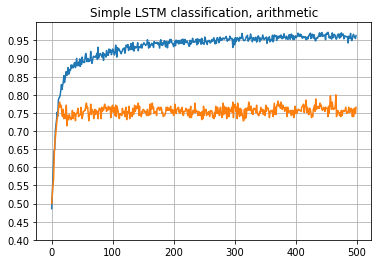

In [23]:
import matplotlib.pyplot as plt

print(history.history.keys())
fig, ax = plt.subplots(1)

ax.set_title("Simple LSTM classification, arithmetic")
ax.set_ylim((0.4,1))
ax.set_yticks(np.arange(0.4,1,0.05))
ax.grid()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

In [24]:
import pickle
## Save model for real-time
# model.summary()
# print(global_mean, global_std)
task = "arith"
model.save('./models/'+'simple_lstm_seq{:d}_{:}.h5'.format(sequence_length, task))
normalizer_dict = {'mean':global_mean,'std':global_std}
config_dict = {'image_size':image_size,'frame_length':frame_length,'sequence_length':sequence_length,'overlap':overlap}

pickle.dump(normalizer_dict, open('./models/'+'simple_lstm_seq{:d}_{:}_normalizer.pickle'.format(sequence_length, task),'wb'))
pickle.dump(config_dict,     open('./models/'+'simple_lstm_seq{:d}_{:}_config.pickle'.format(sequence_length, task),'wb'))

## Train model with encoded features

In [ ]:
img_size = 32
frame_duration = 1
overlap = 0.5
lstm_length = 5
autoencoder = keras.models.load_model('autoEncoderWeights/autoencoder.h5')
encoder = autoencoder.layers[1]

dataPath = Path(r"C:\Users\asus\OneDrive - purdue.edu\RealtimeProject\Experiments3-Data\ArithmeticCalibrationProcedure\edf")
X_arithm_encoded, y_arithm_encoded = createImageDataset(dataPath, imageSize=img_size,frameDuration=frame_duration,overlap=overlap,
                                      image_format=True, augment_data=False, labels = ["EasyAdd","HardMult"],
                                      encoded_format=True, autoencoder=encoder,lstm_format=True, lstm_sequence_length=lstm_length,
                                      fileNameFormat=2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_arithm_encoded, y_arithm_encoded, test_size=0.20,shuffle=True)
print(X_arithm_encoded.shape)
print(x_train.shape)

In [ ]:
##Global frame/time normalization
global_mean = x_train.mean(); global_std = x_train.std();
x_train_2 = (x_train - global_mean)/global_std;
x_test_2 = (x_test - global_mean)/global_std;

## convert class vectors to binary class matrices
y_train_2 = keras.utils.to_categorical(y_train, 2)
y_test_2 = keras.utils.to_categorical(y_test, 2)

x_train_2 = x_train_2.astype('float32')
x_test_2 = x_test_2.astype('float32')

print(y_train.shape)
print(x_train.shape)

In [ ]:
def createLstmModel(input_shape,num_classes, lstmLayers=2, lstmOutputSize=4.0,
                  isBidirectional=1.0, inputLayerNeurons=64, inputLayerDropout=0.25):

    dropoutRate = 0.45
    
    lstmLayers = int(lstmLayers)
    lstmOutputSize =int(lstmOutputSize)
    isBidirectional =int(isBidirectional)

    # Input layer
    networkInput = Input(shape=input_shape)
    dropout1 = Dropout(rate=inputLayerDropout)(networkInput)

    # First Hidden layer
    hidden1 = Dense(inputLayerNeurons, activation='relu')(dropout1)
    dropout2 = Dropout(rate=dropoutRate)(hidden1)
    batchNorm1 = BatchNormalization()(dropout2)

    out = batchNorm1
    for i in range(1, lstmLayers+1):
        retSeq = False if i == lstmLayers else True
        lstmLayer = LSTM(lstmOutputSize, stateful=False, return_sequences=retSeq,
                         dropout=dropoutRate, kernel_regularizer=regularizers.l2(0.05))
        if isBidirectional:
            out = Bidirectional(lstmLayer, merge_mode='concat')(out)
        else:
            out = lstmLayer(out)

    hidden3 = Dense(num_classes, activation='linear')(out)
    networkOutput = Softmax()(hidden3)

    model1 = Model(inputs=networkInput, outputs=networkOutput)
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model1

lstmModel = createLstmModel(x_train_2.shape[1:], 2)
lstmModel.summary()

In [ ]:
##Training
batch_size = 128
num_classes = 2
epochs = 500


history = lstmModel.fit(x_train_2, y_train_2,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test_2, y_test_2),
          shuffle=True)

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
fig, ax = plt.subplots(1)

ax.set_title("Simple LSTM with encoded feat, arithmetic")
ax.set_ylim((0.4,1))
ax.set_yticks(np.arange(0.4,1,0.05))
ax.grid()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])